<a href="https://colab.research.google.com/github/peterske/MATH-335-Copied/blob/main/PetersenFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import Libraries
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
test_mini = True

# Get Data
data = pd.read_csv('/content/CR_Holdout_Data.csv')

mini_data = None
if test_mini:
  mini_data = pd.read_csv('/content/CR_Mini_Holdout_Data.csv')

data.head()

,Names,CR,Size,AC,Hit_Dice,Speed,Climb,Fly,Swim,Burrow,...,Damage_Per_Round,Conditions_Per_Round,DC_AVG,Total_Spells_Known,Avg_Level,Spells_per_Round,Total_number_of_Spell_cast,Spell_level_to_recover,Cr_Round,Total_Number_Of_Spells
0,Generic 30,30.0,4,19,85,30.0,NaN,NaN,NaN,NaN,...,310.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,Generic 29,29.0,4,19,78,30.0,NaN,NaN,NaN,NaN,...,290.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,Generic 28,28.0,4,19,74,30.0,NaN,NaN,NaN,NaN,...,270.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,Generic 27,27.0,4,19,69,30.0,NaN,NaN,NaN,NaN,...,260.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,Generic 26,26.0,4,19,65,30.0,NaN,NaN,NaN,NaN,...,240.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [5]:
# data.dtypes

In [6]:
#data.Avg_Level.value_counts()

In [7]:
data2 = data.replace(np.nan, 0)
#data2

In [8]:
# data2.Avg_Level.value_counts()

In [9]:
# Preprocessing
def preprocessing(data: pd.DataFrame):
  data = pd.get_dummies(data, columns=['Spell_level_to_recover'])
  data['Hit_Points'] = (data['Size'] + data['CON_SAVE_MOD']) * data['Hit_Dice']
  data['Total_Number_Of_Spells'] = data['Avg_Level'] * data['Total_number_of_Spell_cast']
  data['Sum_Of_The_Speeds'] = data['Speed'] + data['Climb'] + data['Fly'] + data['Swim'] + data['Burrow']

  return data

data = preprocessing(data2)

if test_mini:
  mini_data = preprocessing(mini_data)
  left, right = data.align(mini_data, axis=1)
  mini_data = right

In [10]:
# print(data2.head)

In [11]:
# Set X and y
all_features = [f for f in data if f != 'CR' if f != 'Names']
X = data[all_features]
y = data['CR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Create the model, train it, predictions
model = XGBRegressor(
    n_estimators= 210, # Default is 100
    learning_rate= .19, # default = .1
    grow_policy='depthwise', # Options are 'depthwise' and 'lossguide'
    tree_method = 'approx', # Options are 'approx', 'auto', 'exact', 'gpu_exact', 'gpu_hist', 'hist'
)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [13]:
if test_mini:
  miniX = mini_data[all_features]
  miniPredictions = model.predict(miniX)
  
  # place predictions in a dataframe
  miniResults = pd.DataFrame(miniPredictions, columns = ['CR'])
  miniResults = miniResults.rename(columns={'CR':'dataset'})

  miniResults.to_csv("petersen-final-predictions.csv", index=False)
  print('Exported Mini to CSV')

Exported Mini to CSV


# METRICS #

In [14]:
# Compute the Root Mean Squared Error of the predictions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f'Root Mean Squared Error: {round(rmse, 5)}')
print(f'R2 Score:                {round(r2, 2)}')

Root Mean Squared Error: 1.73379
R2 Score:                0.97


# GRAPHS #

<Axes: xlabel='Hit_Points', ylabel='Count'>

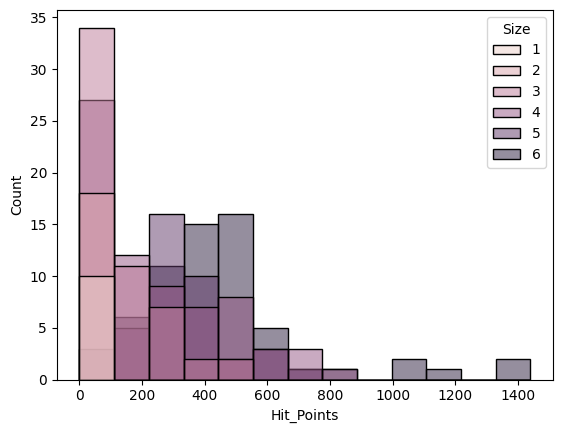

In [15]:
import seaborn as sns

sns.histplot(data=data, x='Hit_Points', hue='Size')

<Axes: xlabel='Size', ylabel='CR'>

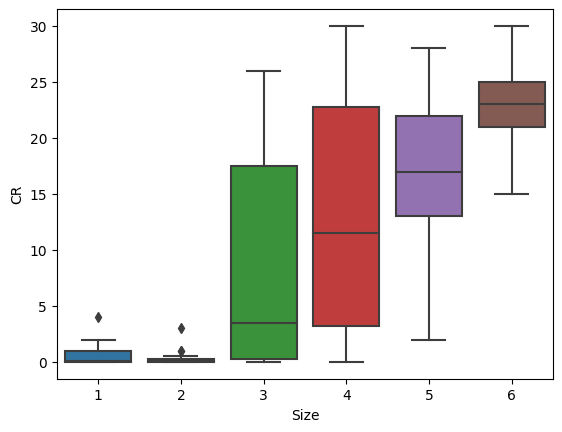

In [16]:
sns.boxplot(data=data, x='Size', y='CR')

<Axes: xlabel='Hit_Points', ylabel='CR'>

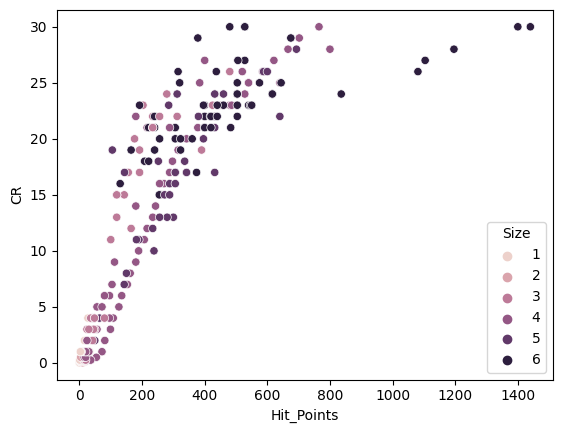

In [17]:
sns.scatterplot(data=data, x="Hit_Points", y="CR", hue='Size')

<Axes: xlabel='Hit_Points', ylabel='CR'>

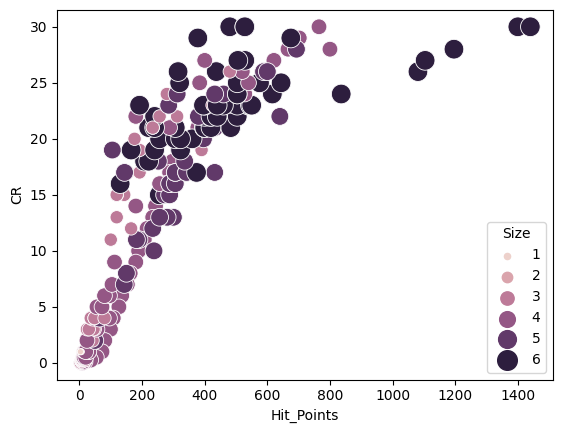

In [18]:
sns.scatterplot(
    data=data, x="Hit_Points", y="CR", hue="Size", size="Size",
    sizes=(20, 200), legend="full"
)